train_set_x_orig:(209, 64, 64, 3)
train_set_y_orig:(1, 209)
test_set_x_orig:(50, 64, 64, 3)
test_set_y_orig:(1, 50)
class:[b'non-cat' b'cat']
梯度下降0后成本为:0.6931471805599453
梯度下降100后成本为:0.5475398685436976
梯度下降200后成本为:4.076361083939942
梯度下降300后成本为:1.023115475126155
梯度下降400后成本为:0.5091233069196331
梯度下降500后成本为:0.7212094890567847
梯度下降600后成本为:0.12121675482212542
梯度下降700后成本为:0.08394753658659067
梯度下降800后成本为:0.06943915170292678
梯度下降900后成本为:0.06139253218720728
梯度下降1000后成本为:0.055872093804016504
梯度下降1100后成本为:0.05165192061366638
梯度下降1200后成本为:0.048227578912526395
梯度下降1300后成本为:0.04534567132390854
梯度下降1400后成本为:0.042860331842558656
梯度下降1500后成本为:0.04067928420530339
梯度下降1600后成本为:0.038740075569156256
梯度下降1700后成本为:0.03699825943626197
梯度下降1800后成本为:0.03542094760699182
梯度下降1900后成本为:0.033983031741402416
训练集识别准确度：100.0%
测试集识别准确度：68.0%


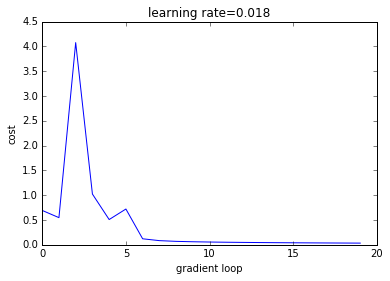

梯度下降0后成本为:0.6931471805599453
梯度下降100后成本为:1.3023606751776544
梯度下降200后成本为:0.7975391999422318
梯度下降300后成本为:0.9398066810150114
梯度下降400后成本为:0.6105745894733869
梯度下降500后成本为:0.4566264891146004
梯度下降600后成本为:0.16301301974008042
梯度下降700后成本为:0.4138010489548401
梯度下降800后成本为:0.11097963919632628
梯度下降900后成本为:0.10019989613783506
梯度下降1000后成本为:0.09252137982902892
梯度下降1100后成本为:0.08636656928809629
梯度下降1200后成本为:0.08115960956021412
梯度下降1300后成本为:0.07662757325094938
梯度下降1400后成本为:0.0726147761534224
梯度下降1500后成本为:0.06902043657000347
梯度下降1600后成本为:0.06577354191240363
梯度下降1700后成本为:0.06282109140958543
梯度下降1800后成本为:0.060121905615604314
梯度下降1900后成本为:0.057643048025892714
训练集识别准确度：100.0%
测试集识别准确度：68.0%


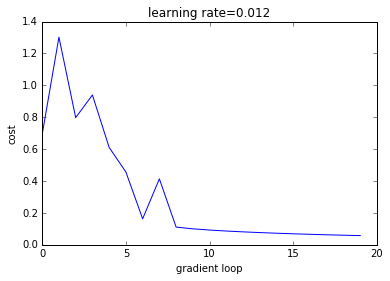

梯度下降0后成本为:0.6931471805599453
梯度下降100后成本为:0.6498112732446272
梯度下降200后成本为:0.5383118237783534
梯度下降300后成本为:0.4392616947889748
梯度下降400后成本为:0.34982476543067453
梯度下降500后成本为:0.2784984357971257
梯度下降600后成本为:0.2497640022987191
梯度下降700后成本为:0.2311776728392282
梯度下降800后成本为:0.21522905139235485
梯度下降900后成本为:0.20133887003959522
梯度下降1000后成本为:0.18910956153096206
梯度下降1100后成本为:0.17824871723940583
梯度下降1200后成本为:0.16853308291181376
梯度下降1300后成本为:0.1597878387174924
梯度下降1400后成本为:0.15187341507476668
梯度下降1500后成本为:0.1446766125630104
梯度下降1600后成本为:0.1381043935810468
梯度下降1700后成本为:0.13207941912877474
梯度下降1800后成本为:0.12653676617044216
梯度下降1900后成本为:0.12142146556603162
训练集识别准确度：99.52153110047847%
测试集识别准确度：68.0%


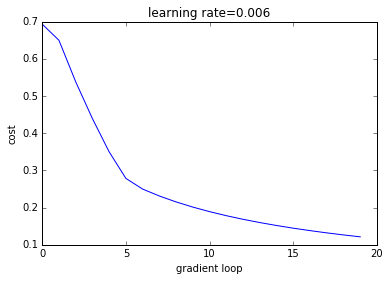

y = 1.0, your algorithm predicts it is a "cat"picture.


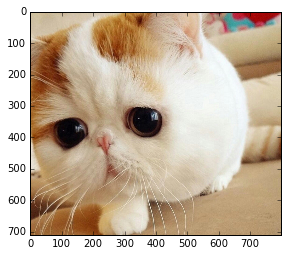

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline 
#读取h5py文件
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 
    classes = np.array(test_dataset["list_classes"][:]) 
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
#load dataset
train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig,classes=load_dataset()
#display the shape of dataset
print("train_set_x_orig:"+str(train_set_x_orig.shape))
print("train_set_y_orig:"+str(train_set_y_orig.shape))
print("test_set_x_orig:"+str(test_set_x_orig.shape))
print("test_set_y_orig:"+str(test_set_y_orig.shape))
print("class:"+str(classes))
#calculate the number of train/test examples
number_train_x=train_set_x_orig.shape[0]
number_test_x=test_set_x_orig.shape[0]
#展平训练集X图像数据，（209，64，64，3）····（12288，209）
#展平测试集X图像数据，（50，64，64，3）······（12288，50）
train_set_x_flatten=train_set_x_orig.reshape(number_train_x,-1).T
test_set_x_flatten=test_set_x_orig.reshape(number_test_x,-1).T
#对图像数据做归一化处理（可以加速优化成本函数），至此数据已经预处理完毕
train_set_x=(train_set_x_flatten-0)/(255-0)
test_set_x=(test_set_x_flatten-0)/(255-0)
#定义激活函数
def activation_function(z):
    a=(1.0/(1+np.exp(-z)))
    return a
#初始化参数 W，b=0 (如果有多个隐藏单元的时候，不能把w初始化为全0)
def initialize_parameters(dimension):
    w=np.zeros((dimension,1))
    b=0
    return w,b
#定义梯度循环函数（包括 FP和BP）
#进行一次梯度循环后（遍历所有样本）返回得到的成本值和梯度值
def gradient_loop(w,b,X,Y):
    m=X.shape[1]
    A=activation_function(np.dot(w.T,X)+b)
    cost=-1.0/m*(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))  #一次FP后所有样本的loss平均值
    dw=1.0/m*np.dot(X,(A-Y).T)
    db=1.0/m*np.sum(A-Y)
    gradients={"dw":dw,
               "db":db}
    return cost,gradients  
#经过n次梯度循环后，得到最终的w，b 更新参数，找出最优解而且也得到了n次循环的cost
def optimize(w,b,X,Y,number_gradient,learning_rate):
    costs=[]
    for i in range(number_gradient):
        cost,gradients=gradient_loop(w,b,X,Y)#每一次梯度循环都遍历所有样本
        dw=gradients["dw"]
        db=gradients["db"]
        w-=learning_rate*dw
        b-=learning_rate*db
        if i%100==0:
            costs.append(cost)#每隔100次训练记录一次成本值
            print("梯度下降{0}后成本为:{1}".format(i,cost))
    parameters={"w":w,
                "b":b}
    return parameters,costs
#对测试集进行预测，返回预测值矩阵
def prediction(w,b,X):
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    Y_hat=activation_function(np.dot(w.T,X)+b)
    for i in range(m):
        if Y_hat[0][i]>0.5:
            Y_prediction[0][i]=1
        else:
            Y_prediction[0][i]=0
    return Y_prediction
def logistic_regression(X_train,Y_train,X_test,Y_test,number_gradient,learning_rate):
    w,b=initialize_parameters(X_train.shape[0])
    parameters,costs=optimize(w,b,X_train,Y_train,number_gradient,learning_rate)
    w=parameters["w"]  #经过n次梯度循环后学习到的w
    b=parameters["b"]  #经过n次梯度循环后学习到的b
    Y_prediction_train=prediction(w,b,X_train)
    Y_prediction_test=prediction(w,b,X_test)
    train_accuracy=100-np.mean(np.abs(Y_prediction_train-Y_train))*100
    test_accuracy=100-np.mean(np.abs(Y_prediction_test-Y_test))*100
    print("训练集识别准确度：{}%".format(train_accuracy))
    print("测试集识别准确度：{}%".format(test_accuracy))
    test_parameters={"w":w,
                     "b":b}
    return costs,test_parameters
learning_rate=[0.018,0.012,0.006]
for i in range(3):
    costs,test_parameters=logistic_regression(train_set_x,train_set_y_orig,test_set_x,test_set_y_orig,
                                              number_gradient=2000,learning_rate=learning_rate[i])
    #绘制代价函数曲线
    plt.plot(costs)
    plt.ylabel("cost")
    plt.xlabel("gradient loop")
    plt.title("learning rate="+str(learning_rate[i]))
    plt.show()
    if i==2:
        my_image = "ML1.jpg"    
        # We preprocess the image to fit your algorithm.
        fname = "images/" + my_image  #其中“images”是存储图像的文件夹
        image = ndimage.imread(fname, flatten=False)  #读取图片
        my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T #放缩图像
        my_predicted_image = prediction(test_parameters["w"], test_parameters["b"], my_image)  #预测
        plt.imshow(image)
        print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts it is a \"" +
            classes[int(np.squeeze(my_predicted_image))].decode("utf-8") +  "\"picture.")    # \"是python 中的 双引号转义字符
            
  

                                                                                                                                                       
        

